In [1]:
#import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Create the data and the model

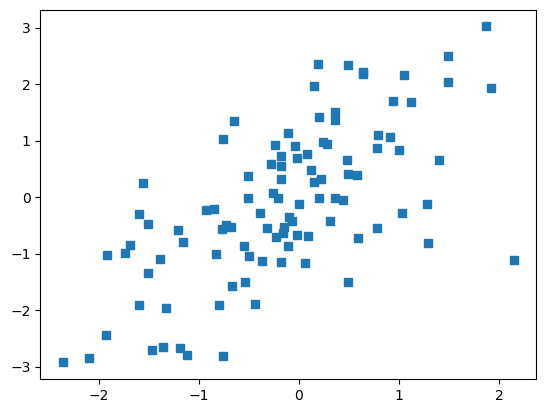

In [2]:
N=100
x=torch.randn(N,1)
y=x+torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()

In [4]:
#build the model
ANNreg=nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(),#activation function
    nn.Linear(1,1) #output layer
)

In [8]:
#model meta-paramaters
learningRate=.05
#loss function
lossfun=nn.MSELoss()
#optimizer
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [12]:
#select data for training
trainidx=np.random.choice(range(N),80,replace=False)
#randomly selects 80 unique indices (no repetition)
trainBool=np.zeros(N,dtype=bool) #initialize vectoe of Falses
#Creates a Boolean array of length N = 100, all initialized as False.
trainBool[trainidx]=True #set selected samples to tre

#For all indices that appear in trainidx, it sets the corresponding position in trainBool to True.


#show the size
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


Train the model

In [14]:
numepochs=500
for epochi in range(numepochs):
    #forward pass
    yHat=ANNreg(x[trainBool])
    #compute loss
    loss=lossfun(yHat,y[trainBool])
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
     



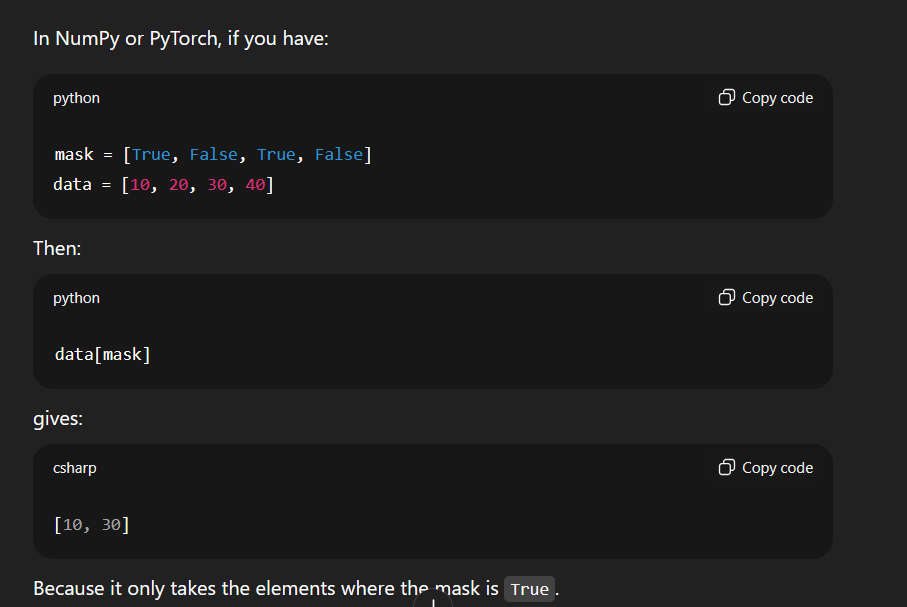


In [16]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.13
Final TEST loss: 0.85


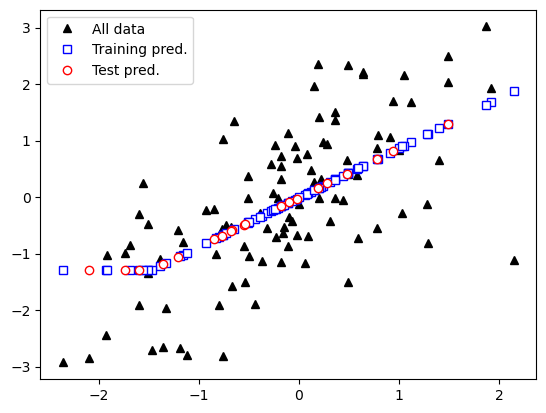

In [17]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()
     